# Dummy Veriable Handling Nominal Dataset

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df=pd.read_excel("dataset.xlsx")
df.head(12)

,town,area,price
0,township,3456,123123
1,township,5742,123124
2,township,7676,12324
3,township,3453,4342
4,township,4353,234235
5,west windsor,45345,523423
6,west windsor,4645,5465
7,west windsor,4545,455
8,west windsor,3434,57667
9,robinsville,4545,34536


In [76]:
data=pd.get_dummies(df.town)
data


,robinsville,township,west windsor
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,True,False,False


In [77]:
data=data.astype(int)
data

,robinsville,township,west windsor
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


# Concate

In [78]:
df=pd.concat([df,data] ,axis="columns")

In [79]:
df

,town,area,price,robinsville,township,west windsor
0,township,3456,123123,0,1,0
1,township,5742,123124,0,1,0
2,township,7676,12324,0,1,0
3,township,3453,4342,0,1,0
4,township,4353,234235,0,1,0
5,west windsor,45345,523423,0,0,1
6,west windsor,4645,5465,0,0,1
7,west windsor,4545,455,0,0,1
8,west windsor,3434,57667,0,0,1
9,robinsville,4545,34536,1,0,0


# For Model Accuracy persistent remove Deduced on any column and one parent column 

In [80]:
df.drop(['town'] , axis="columns" , inplace=True)

In [81]:
df

,area,price,robinsville,township,west windsor
0,3456,123123,0,1,0
1,5742,123124,0,1,0
2,7676,12324,0,1,0
3,3453,4342,0,1,0
4,4353,234235,0,1,0
5,45345,523423,0,0,1
6,4645,5465,0,0,1
7,4545,455,0,0,1
8,3434,57667,0,0,1
9,4545,34536,1,0,0


In [82]:
df.drop(["township"],axis="columns",inplace=True)

In [83]:
df

,area,price,robinsville,west windsor
0,3456,123123,0,0
1,5742,123124,0,0
2,7676,12324,0,0
3,3453,4342,0,0
4,4353,234235,0,0
5,45345,523423,0,1
6,4645,5465,0,1
7,4545,455,0,1
8,3434,57667,0,1
9,4545,34536,1,0


In [84]:
df.to_excel("cleaned.xlsx")

In [85]:
df

,area,price,robinsville,west windsor
0,3456,123123,0,0
1,5742,123124,0,0
2,7676,12324,0,0
3,3453,4342,0,0
4,4353,234235,0,0
5,45345,523423,0,1
6,4645,5465,0,1
7,4545,455,0,1
8,3434,57667,0,1
9,4545,34536,1,0


# Drop Target Veriable for Used Prediction ahead

In [86]:
x=df.drop("price",axis="columns")

# X values containing else Price COLUMNS

In [87]:
x

,area,robinsville,west windsor
0,3456,0,0
1,5742,0,0
2,7676,0,0
3,3453,0,0
4,4353,0,0
5,45345,0,1
6,4645,0,1
7,4545,0,1
8,3434,0,1
9,4545,1,0


In [88]:
y=df.price

# Price Column stored in Y veriable

In [89]:
y

0     123123
1     123124
2      12324
3       4342
4     234235
5     523423
6       5465
7        455
8      57667
9      34536
10    353454
11     34535
Name: price, dtype: int64

# Fit Linear Regression Model 

In [90]:
from sklearn import linear_model

In [91]:
model=linear_model.LinearRegression()

In [92]:
model.fit(x,y)

LinearRegression()

In [93]:
model.predict([[3600,0,0]])

C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([83412.34416258])

# One Hot Encoding method for Nominal Dataset Handling

# Label Encoder

In [94]:
df=pd.read_excel("dataset.xlsx")
df.head(12)

,town,area,price
0,township,3456,123123
1,township,5742,123124
2,township,7676,12324
3,township,3453,4342
4,township,4353,234235
5,west windsor,45345,523423
6,west windsor,4645,5465
7,west windsor,4545,455
8,west windsor,3434,57667
9,robinsville,4545,34536


In [95]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
dlfe=df
dlfe.town= le.fit_transform(dlfe.town)
dlfe


,town,area,price
0,1,3456,123123
1,1,5742,123124
2,1,7676,12324
3,1,3453,4342
4,1,4353,234235
5,2,45345,523423
6,2,4645,5465
7,2,4545,455
8,2,3434,57667
9,0,4545,34536


# 1 Hot Encoder

In [101]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
x = dlfe[['town', 'area']].values 
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = ct.fit_transform(x)
print(x) 
y = dlfe.price.valuesa

[[0.0000e+00 1.0000e+00 0.0000e+00 3.4560e+03]
 [0.0000e+00 1.0000e+00 0.0000e+00 5.7420e+03]
 [0.0000e+00 1.0000e+00 0.0000e+00 7.6760e+03]
 [0.0000e+00 1.0000e+00 0.0000e+00 3.4530e+03]
 [0.0000e+00 1.0000e+00 0.0000e+00 4.3530e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00 4.5345e+04]
 [0.0000e+00 0.0000e+00 1.0000e+00 4.6450e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00 4.5450e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00 3.4340e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 4.5450e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 5.6560e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 5.5460e+03]]


In [102]:
x=x[:,1:] ## all rows but one 
x

array([[1.0000e+00, 0.0000e+00, 3.4560e+03],
       [1.0000e+00, 0.0000e+00, 5.7420e+03],
       [1.0000e+00, 0.0000e+00, 7.6760e+03],
       [1.0000e+00, 0.0000e+00, 3.4530e+03],
       [1.0000e+00, 0.0000e+00, 4.3530e+03],
       [0.0000e+00, 1.0000e+00, 4.5345e+04],
       [0.0000e+00, 1.0000e+00, 4.6450e+03],
       [0.0000e+00, 1.0000e+00, 4.5450e+03],
       [0.0000e+00, 1.0000e+00, 3.4340e+03],
       [0.0000e+00, 0.0000e+00, 4.5450e+03],
       [0.0000e+00, 0.0000e+00, 5.6560e+03],
       [0.0000e+00, 0.0000e+00, 5.5460e+03]])

In [98]:
model.fit(x,y)


LinearRegression()

In [99]:
model.predict([[0,0,34000]])

array([485536.36919779])

In [100]:
model.score(x,y)

0.633023368500214

# Save Model Using joblib

In [104]:
import joblib

In [106]:
joblib.dump(model,"model_joblib")

['model_joblib']

In [108]:
obj=joblib.load("model_joblib")

In [109]:
obj.coef_

array([-3.76595210e+04, -1.04906158e+05,  1.19889640e+01])

In [110]:
obj.intercept_

77911.59489225049

In [111]:
obj.score(x,y)

0.633023368500214

# Save Modle using pickle method

In [415]:
import pickle

In [416]:
with open("model_pickle",'wb') as file: 
    pickle.dump(model,file)

In [417]:
with open("model_pickle",'rb') as f:
  obj2= pickle.load(f)

In [418]:
obj2.coef_

array([-3.70122094e-01, -1.33245363e+03, -2.45354074e+03, -6.73820733e+03])

In [419]:
obj2.intercept_

58976.625968537235

In [420]:
obj2.score(x,y)

0.9417050937281083

# Practice Problem 

In [421]:
import pandas as pd
import numpy as np

In [422]:
a=data=df=pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


# Pattern Visalization 

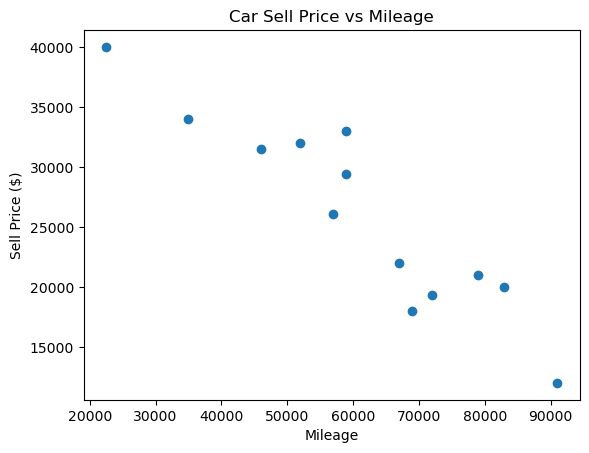

In [423]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(df)

# Scatter plot
plt.scatter(df['Mileage'], df['Sell Price($)'])

# Title and labels
plt.title("Car Sell Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Sell Price ($)")

plt.show()


# Enable Data

In [424]:
from sklearn.preprocessing import LabelEncoder
le=df

In [425]:
le=LabelEncoder()

In [426]:
data=dfle=df

In [427]:
dfle["Car Model"]=le.fit_transform(df["Car Model"])

In [428]:
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


# Fit Linear Regression Model

In [429]:
from sklearn import linear_model

In [430]:
data=dfle.drop("Sell Price($)" ,axis="columns" , inplace=True)

In [431]:
data

In [432]:
x=dfle


In [433]:
df

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [434]:
y=a["Sell Price($)"]

In [435]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [436]:
x

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [437]:
model=linear_model.LinearRegression()

In [438]:
model.fit(x,a["Sell Price($)"])

LinearRegression()

In [439]:
model.predict([[1,7000,6]])

C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([48386.03724644])

In [440]:
model.score(x,y)

0.8719970367825952

In [441]:
z=model.predict(dfle)

In [442]:
dfle["Predicted"]=z
dfle

,Car Model,Mileage,Age(yrs),Predicted
0,1,69000,6,22855.471767
1,1,35000,3,36101.346909
2,1,57000,5,27545.285691
3,1,22500,2,40997.052489
4,1,46000,4,31823.316300
5,0,59000,5,25620.046493
6,0,52000,5,28502.529693
7,0,72000,6,20518.449256
8,0,91000,8,13197.737981
9,2,67000,6,24780.710965


# One Hot Decoder

In [443]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame df with columns: 'Car Model', 'Mileage', 'Sell Price($)', 'Age(yrs)'
# Define the ColumnTransformer
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# Example data (replace with your actual data)
df = pd.DataFrame(dfle)

# Transform the data
transformed_data = ct.fit_transform(df)
x=transformed_data
# Print or use transformed_data as needed
print(transformed_data)

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 6.90000000e+04
  6.00000000e+00 2.28554718e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 3.50000000e+04
  3.00000000e+00 3.61013469e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 5.70000000e+04
  5.00000000e+00 2.75452857e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 2.25000000e+04
  2.00000000e+00 4.09970525e+04]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 4.60000000e+04
  4.00000000e+00 3.18233163e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 5.90000000e+04
  5.00000000e+00 2.56200465e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 5.20000000e+04
  5.00000000e+00 2.85025297e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 7.20000000e+04
  6.00000000e+00 2.05184493e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 9.10000000e+04
  8.00000000e+00 1.31977380e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 6.70000000e+04
  6.00000000e+00 2.47807110e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 8.3

In [444]:
x=x[:,1:] ## all rows but one 
x

array([[1.00000000e+00, 0.00000000e+00, 6.90000000e+04, 6.00000000e+00,
        2.28554718e+04],
       [1.00000000e+00, 0.00000000e+00, 3.50000000e+04, 3.00000000e+00,
        3.61013469e+04],
       [1.00000000e+00, 0.00000000e+00, 5.70000000e+04, 5.00000000e+00,
        2.75452857e+04],
       [1.00000000e+00, 0.00000000e+00, 2.25000000e+04, 2.00000000e+00,
        4.09970525e+04],
       [1.00000000e+00, 0.00000000e+00, 4.60000000e+04, 4.00000000e+00,
        3.18233163e+04],
       [0.00000000e+00, 0.00000000e+00, 5.90000000e+04, 5.00000000e+00,
        2.56200465e+04],
       [0.00000000e+00, 0.00000000e+00, 5.20000000e+04, 5.00000000e+00,
        2.85025297e+04],
       [0.00000000e+00, 0.00000000e+00, 7.20000000e+04, 6.00000000e+00,
        2.05184493e+04],
       [0.00000000e+00, 0.00000000e+00, 9.10000000e+04, 8.00000000e+00,
        1.31977380e+04],
       [0.00000000e+00, 1.00000000e+00, 6.70000000e+04, 6.00000000e+00,
        2.47807110e+04],
       [0.00000000e+00, 1.0000

In [445]:
y=a["Sell Price($)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [446]:
model.fit(x,y)

LinearRegression()

In [447]:
model.predict([[12,23,6900,0,1]])

array([52713.85186052])

In [448]:
model.score(x,y)

0.9417050937281083

# Dummy Variable 

In [449]:
df=pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [450]:
x=pd.get_dummies(df["Car Model"]).astype(int)

In [451]:
x

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [452]:
df=pd.concat([df,x],axis=1)
df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [453]:
df=df.drop(["Car Model","Mercedez Benz C class"], axis=1)

In [454]:
x=df.drop("Sell Price($)",axis="columns")

In [455]:
df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [456]:
y=df["Sell Price($)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [457]:
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


# Fit Linear Regression Model

In [458]:
model.fit(x,y)

LinearRegression()

In [459]:
model.predict([[45000,4,0,0]])

C:\Users\FAST LAPTOP\OneDrive\Documents\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [460]:
model.score(x,y)

0.9417050937281083